In [143]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [144]:
df = pd.read_csv('oasis_longitudinal.csv',index_col=0).iloc[:,1:]

In [145]:
df = df[df.Group != 'Converted']

In [146]:
filtered = df.dropna().drop('Hand',axis=1).drop('CDR',axis=1)

In [147]:
gender = {'M':1,'F':0}
groups = {'Demented':1,'Nondemented':0}

In [148]:
filtered['M/F'] = filtered['M/F'].apply(lambda x:gender[x])
filtered['Group'] = filtered['Group'].apply(lambda x:groups[x])

In [149]:
X = filtered.iloc[:,1:]

In [150]:
y = filtered.iloc[:,0]

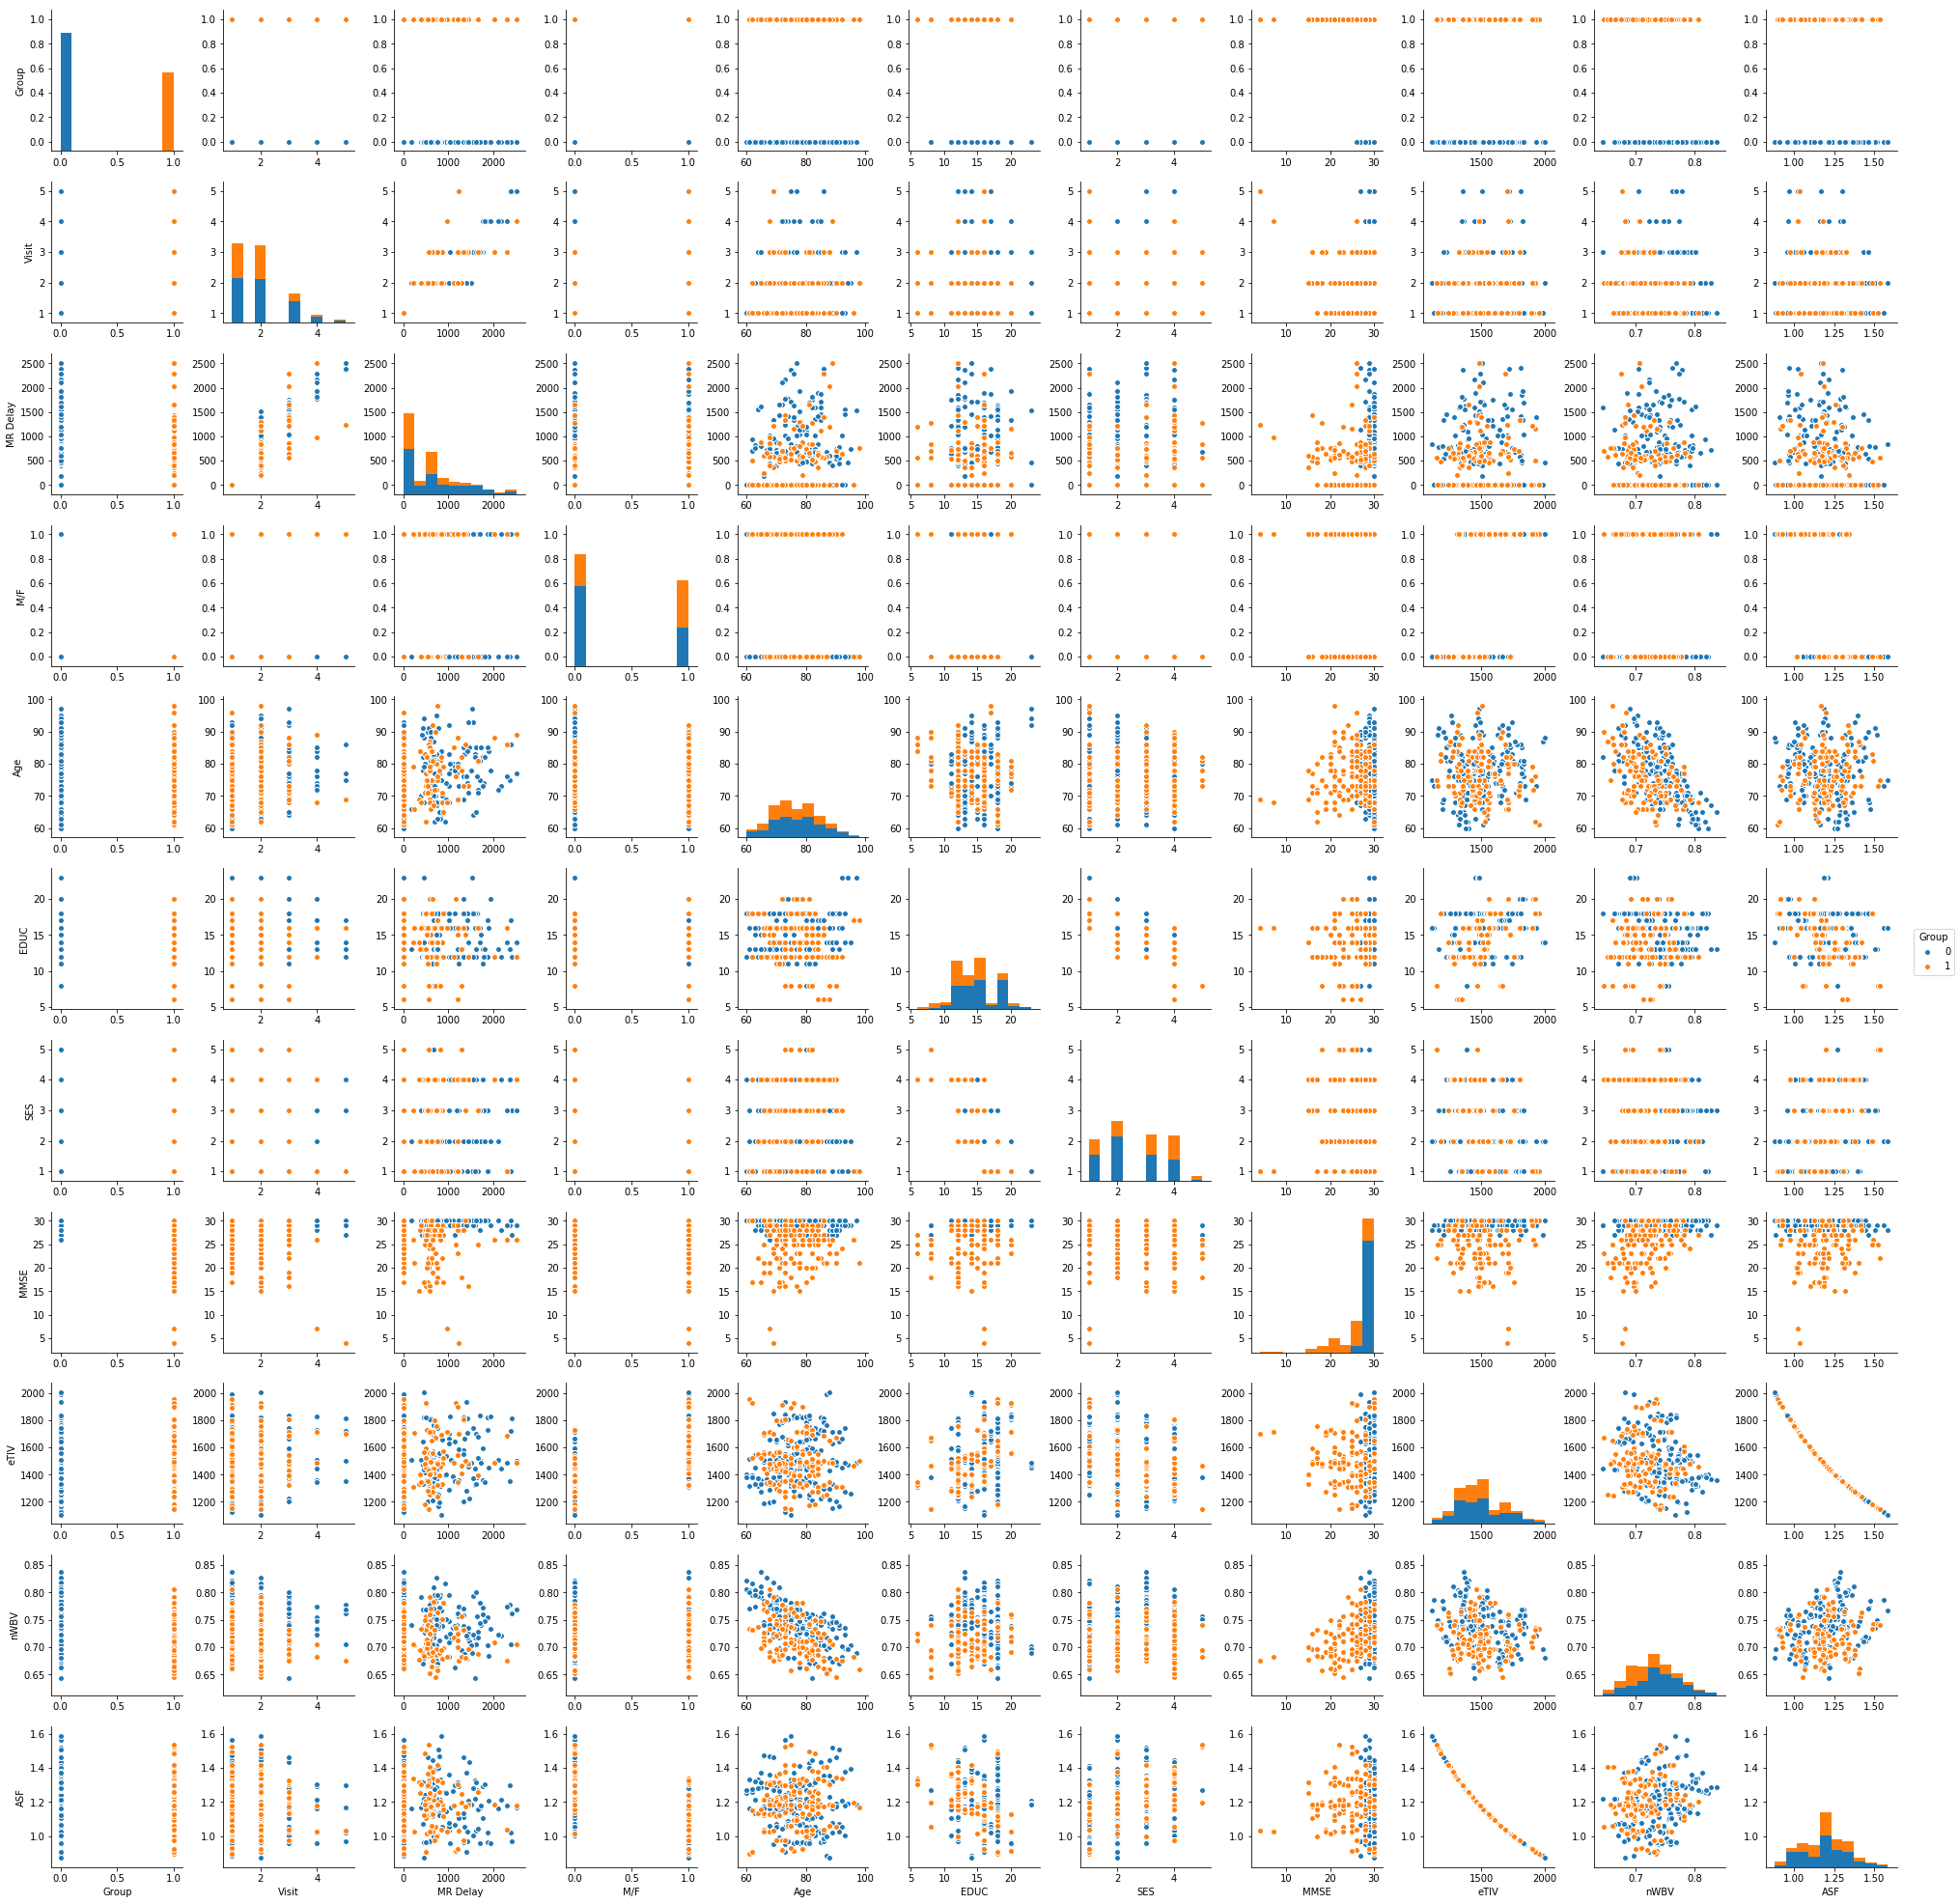

In [151]:
sns.pairplot(filtered, hue='Group')

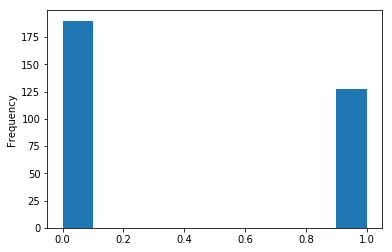

In [152]:
filtered['Group'].plot(kind='hist')

In [237]:
from sklearn.preprocessing import StandardScaler

In [238]:
X_scaled = StandardScaler().fit_transform(X)

In [239]:
from sklearn.model_selection import train_test_split

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [241]:
from sklearn.neighbors import KNeighborsClassifier

In [242]:
results_single = {}

In [243]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
results_single.update({"knn":knn.score(X_test,y_test)})

In [244]:
from sklearn.linear_model import LogisticRegression

In [245]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
results_single.update({'lr':lr.score(X_test,y_test)})

In [246]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [247]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
results_single.update({'lda':lda.score(X_test, y_test)})

In [248]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
results_single.update({'qda':qda.score(X_test, y_test)})

In [249]:
from sklearn.tree import DecisionTreeClassifier

In [250]:
t = DecisionTreeClassifier()
t.fit(X_train, y_train)
results_single.update({'dt':t.score(X_test, y_test)})

In [251]:
from sklearn.ensemble import RandomForestClassifier

In [252]:
e = RandomForestClassifier()
e.fit(X_train, y_train)
results_single.update({'rf':e.score(X_test,y_test)})

In [253]:
from sklearn.ensemble import BaggingClassifier

In [254]:
l = dict({'knn':KNeighborsClassifier(), 'lr':LogisticRegression(), 'lda':LinearDiscriminantAnalysis(), 
     'qda':QuadraticDiscriminantAnalysis(), 'dt':DecisionTreeClassifier()})

In [255]:
b = dict({(i,BaggingClassifier(l[i])) for i in l.keys()})

In [256]:
fitted = [b[i].fit(X_train, y_train) for i in b.keys()]

In [257]:
scores = dict({(i, b[i].score(X_test, y_test)) for i in b.keys()})

In [258]:
scores

{'dt': 0.859375,
 'knn': 0.8125,
 'lda': 0.890625,
 'lr': 0.890625,
 'qda': 0.890625}

In [259]:
results_single

{'dt': 0.78125,
 'knn': 0.859375,
 'lda': 0.875,
 'lr': 0.890625,
 'qda': 0.859375,
 'rf': 0.859375}

In [ ]:
n = len(set(results.keys()).union(ensemble_results.keys()))

x1 = [1,2,7,3,4,5,6]
x2 = [8,1,2,3,4,5,6]
x = x1[:]
x.append(8)
ks = list(results.keys())
ks.append('ensembles')

plt.plot(x1, list(result[0] for result in results.values()),'ro',c='b',label='original')
plt.plot(x2, list(result[0] for result in ensemble_results.values()),'ro',label='ensemble')
#plt.xticks(x1, list(results.keys()),rotation='vertical')
#plt.xticks(x2, list(ensemble_results.keys()),rotation='vertical')
plt.xticks(x, ks, rotation='vertical')
plt.ylim(0.55,1)
plt.legend()

plt.savefig('accuracy',pad_inches=1)
plt.show()

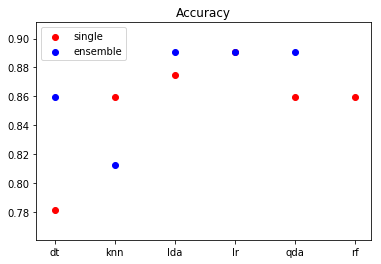

In [266]:
plt.title('Accuracy')
plt.scatter(x=results_single.keys(), y=results_single.values(), c='r', label='single')
plt.scatter(x=scores.keys(), y=scores.values(), c='b', label='ensemble')
plt.legend()

In [260]:
from sklearn.ensemble import VotingClassifier

In [261]:
vc = VotingClassifier(list(zip(l.keys(),l.values())))
vc.fit(X_train, y_train)
vc.score(X_test, y_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.90625